In [2]:
import re
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


def draw_hist(title, values):
    plt.figure()
    plt.title('{}. Avg = {}'.format(title, np.average(values)))
    n, bins, patches = plt.hist(values, 50, normed=1, facecolor='green', alpha=0.75)


def extract_lines(lines, pattern, group_num=0):
    res = []
    for l in lines:
        match = pattern.search(l)
        if match is not None:
            res.append(match.group(group_num))
    return res


def match_pattern(idx, lines, pattern):
    while (idx < len(lines) and pattern.search(lines[idx]) is None):
        idx += 1
        
    if idx < len(lines):
        match = pattern.search(lines[idx])                
        assert(match is not None)
        idx += 1        
        return idx, match
    else:
        return idx, None

    
def extract_full_detection_stat(lines):
    full_det_pattern = re.compile(r'Full detection.')
    pnet_full_time_pattern = re.compile(r'firstStage: ([\d\.]+)')
    pnet_run_time_pattern = re.compile(r'firstStageProposals: ([\d\.]+)')    
    rnet_full_time_pattern = re.compile(r'secondStage: ([\d\.]+)')
    rnet_run_time_pattern = re.compile(r'secondStageProposals: ([\d\.]+)')    
    rnet_num_proposals_pattern = re.compile(r'secondStageNumTiles: (\d+)')    
    onet_full_time_pattern = re.compile(r'thirdStage: ([\d\.]+)')
    onet_run_time_pattern = re.compile(r'thirdStageProposals: ([\d\.]+)')    
    onet_num_proposals_pattern = re.compile(r'thirdStageNumTiles: (\d+)')    
    detector_time_pattern = re.compile(r'Time of detector : (\d+) milliseconds.')
    tracker_time_pattern = re.compile(r'Time of tracker : (\d+) milliseconds.')    
    full_time_pattern = re.compile(r'Full time : (\d+) milliseconds.')

    res = []
    idx = 0
    while idx < len(lines):
        idx, match = match_pattern(idx, lines, full_det_pattern)
        if match is None:
            continue
        idx, match = match_pattern(idx, lines, pnet_full_time_pattern)
        pnet_full_time = match.group(1)

        idx, match = match_pattern(idx, lines, pnet_run_time_pattern)
        pnet_run_time = match.group(1)

        idx, match = match_pattern(idx, lines, rnet_full_time_pattern)
        rnet_full_time = match.group(1)

        idx, match = match_pattern(idx, lines, rnet_run_time_pattern)
        rnet_run_time = match.group(1)
        
        idx, match = match_pattern(idx, lines, rnet_num_proposals_pattern)
        rnet_num_proposals = match.group(1)        

        idx, match = match_pattern(idx, lines, onet_full_time_pattern)
        onet_full_time = match.group(1)

        idx, match = match_pattern(idx, lines, onet_run_time_pattern)
        onet_run_time = match.group(1)
        
        idx, match = match_pattern(idx, lines, onet_num_proposals_pattern)
        onet_num_proposals = match.group(1)        

        idx, match = match_pattern(idx, lines, detector_time_pattern)
        detector_time = match.group(1)

        idx, match = match_pattern(idx, lines, tracker_time_pattern)
        tracker_time = match.group(1)            
            
        idx, match = match_pattern(idx, lines, full_time_pattern)
        full_time = match.group(1)

        res.append({'detector_time' : float(detector_time),
                    'full_time' : float(full_time),
                    'tracker_time': float(tracker_time),
                    'pnet_full_time' : float(pnet_full_time),
                    'rnet_full_time' : float(rnet_full_time),
                    'onet_full_time' : float(onet_full_time),
                    'pnet_run_time' : float(pnet_run_time),
                    'rnet_run_time' : float(rnet_run_time),
                    'onet_run_time' : float(onet_run_time),
                    'rnet_num_proposals' : int(rnet_num_proposals),
                    'onet_num_proposals' : int(onet_num_proposals)
                   })
    return res


def extract_part_detection_stat(lines):
    part_det_pattern = re.compile(r'Part detection.')
    no_det_pattern = re.compile(r'No detection')
    pnet_full_time_pattern = re.compile(r'firstStage: ([\d\.]+)')
    pnet_run_time_pattern = re.compile(r'firstStageProposals: ([\d\.]+)')    
    rnet_full_time_pattern = re.compile(r'secondStage: ([\d\.]+)')
    rnet_run_time_pattern = re.compile(r'secondStageProposals: ([\d\.]+)')    
    rnet_num_proposals_pattern = re.compile(r'secondStageNumTiles: (\d+)')    
    onet_full_time_pattern = re.compile(r'thirdStage: ([\d\.]+)')
    onet_run_time_pattern = re.compile(r'thirdStageProposals: ([\d\.]+)')
    onet_num_proposals_pattern = re.compile(r'thirdStageNumTiles: (\d+)')    
    detector_time_pattern = re.compile(r'Time of redetector : (\d+) milliseconds.')
    tracker_time_pattern = re.compile(r'Time of tracker : (\d+) milliseconds.')    
    full_time_pattern = re.compile(r'Full time : (\d+) milliseconds.')

    res = []
    idx = 0    
    while idx < len(lines):
        idx, match = match_pattern(idx, lines, part_det_pattern)
        if match is None:
            continue
        
        # no tracks to perform redetection
        if no_det_pattern.search(lines[idx]) is not None:
            idx, match = match_pattern(idx, lines, full_time_pattern)
            full_time = match.group(1)            

            res.append({'detector_time' : float(0),
                        'tracker_time' : float(0),
                        'full_time' : float(full_time),
                        'pnet_full_time' : float(0),
                        'rnet_full_time' : float(0),
                        'onet_full_time' : float(0),
                        'pnet_run_time' : float(0),
                        'rnet_run_time' : float(0),
                        'onet_run_time' : float(0),
                        'rnet_num_proposals' : int(0),
                        'onet_num_proposals' : int(0)
                       })
        else:
            # processing all redetection, because right now we run separate redetection for each detection
            pnet_full_time = 0
            pnet_run_time = 0
            rnet_full_time = 0
            rnet_run_time = 0
            rnet_num_proposals = 0
            onet_full_time = 0
            onet_run_time = 0
            onet_num_proposals = 0
            while True:
                idx, match = match_pattern(idx, lines, pnet_full_time_pattern)
                pnet_full_time += float(match.group(1))

                idx, match = match_pattern(idx, lines, pnet_run_time_pattern)
                pnet_run_time += float(match.group(1))

                idx, match = match_pattern(idx, lines, rnet_full_time_pattern)
                rnet_full_time += float(match.group(1))

                idx, match = match_pattern(idx, lines, rnet_run_time_pattern)
                rnet_run_time += float(match.group(1))

                idx, match = match_pattern(idx, lines, rnet_num_proposals_pattern)
                rnet_num_proposals += int(match.group(1))        

                idx, match = match_pattern(idx, lines, onet_full_time_pattern)
                onet_full_time += float(match.group(1))

                idx, match = match_pattern(idx, lines, onet_run_time_pattern)
                onet_run_time += float(match.group(1))

                idx, match = match_pattern(idx, lines, onet_num_proposals_pattern)
                onet_num_proposals += int(match.group(1))     

                try_idx, match = match_pattern(idx, lines, detector_time_pattern)
                if try_idx - idx == 2: # indicates that we have last redetection
                    break
            
            idx, match = match_pattern(idx, lines, detector_time_pattern)
            detector_time = match.group(1)
                
            idx, match = match_pattern(idx, lines, tracker_time_pattern)
            tracker_time = match.group(1)            

            idx, match = match_pattern(idx, lines, full_time_pattern)
            full_time = match.group(1)            

            res.append({'detector_time' : float(detector_time),
                        'tracker_time' : float(tracker_time),
                        'full_time' : float(full_time),
                        'pnet_full_time' : float(pnet_full_time),
                        'rnet_full_time' : float(rnet_full_time),
                        'onet_full_time' : float(onet_full_time),
                        'pnet_run_time' : float(pnet_run_time),
                        'rnet_run_time' : float(rnet_run_time),
                        'onet_run_time' : float(onet_run_time),
                        'rnet_num_proposals' : int(rnet_num_proposals),
                        'onet_num_proposals' : int(onet_num_proposals)
                       })

    return res


def extract_stat(lines_fs):
    # lines_fs
    full_detection_times = extract_full_detection_stat(lines_fs)
    num_full_detections = len(full_detection_times)
    
    part_detection_times = extract_part_detection_stat(lines_fs)
    num_part_detections = len(part_detection_times)
    
    # visualization
    print('Number of all frames = {}'.format(num_full_detections + num_part_detections))
    print('Part detection = {}, full detection = {}, proportion of part detections = {}'.format(
        num_part_detections, num_full_detections,
        float(num_part_detections) / (num_full_detections + num_part_detections)))    
    print('Full time = {}'.format(
        np.sum([float(t['full_time']) for t in full_detection_times + part_detection_times])))
    
    print('Full detection:')
    print('\t full time = {}'.format(
        np.sum([float(t['full_time']) for t in full_detection_times])))
    print('\t detector time = {}'.format(
        np.sum([float(t['detector_time']) for t in full_detection_times])))
    print('\t tracker time = {}'.format(
        np.sum([float(t['tracker_time']) for t in full_detection_times])))
    
    print('\t pnet time full = {}, ->run() = {}'.format(
        np.sum([float(t['pnet_full_time']) for t in full_detection_times]),
        np.sum([float(t['pnet_run_time']) for t in full_detection_times])
    ))
    print('\t rnet time full = {}, ->run() = {}, num_proposals = {}'.format(
        np.sum([float(t['rnet_full_time']) for t in full_detection_times]),
        np.sum([float(t['rnet_run_time']) for t in full_detection_times]),
        np.sum([int(t['rnet_num_proposals']) for t in full_detection_times])
    ))
    print('\t onet time full = {}, ->run() = {}, num_proposals = {}'.format(
        np.sum([float(t['onet_full_time']) for t in full_detection_times]),
        np.sum([float(t['onet_run_time']) for t in full_detection_times]),
        np.sum([int(t['onet_num_proposals']) for t in full_detection_times])
    ))
    draw_hist('Full detection: full time', [float(t['full_time']) for t in full_detection_times])
    draw_hist('Full detection: detector time', [float(t['detector_time']) for t in full_detection_times])
    draw_hist('Full detection: tracker time', [float(t['tracker_time']) for t in full_detection_times])    
    draw_hist('Full detection: PNET', [float(t['pnet_full_time']) for t in full_detection_times])
    draw_hist('Full detection: RNET', [float(t['rnet_full_time']) for t in full_detection_times])
    draw_hist('Full detection: ONET', [float(t['onet_full_time']) for t in full_detection_times])
    draw_hist('Full detection: RNET num proposals', [int(t['rnet_num_proposals']) for t in full_detection_times])
    draw_hist('Full detection: ONET num proposals', [int(t['onet_num_proposals']) for t in full_detection_times])
    
        
    print('Part detection:')
    print('\t full time = {}'.format(
        np.sum([float(t['full_time']) for t in part_detection_times])))
    print('\t detector time = {}'.format(
        np.sum([float(t['detector_time']) for t in part_detection_times])))
    print('\t tracker time = {}'.format(
        np.sum([float(t['tracker_time']) for t in part_detection_times])))
    
    print('\t pnet time = {}, ->run() = {}'.format(
        np.sum([float(t['pnet_full_time']) for t in part_detection_times]),
        np.sum([float(t['pnet_run_time']) for t in part_detection_times])
    ))
    print('\t rnet time = {}, ->run() = {}, num_proposals = {}'.format(
        np.sum([float(t['rnet_full_time']) for t in part_detection_times]),
        np.sum([float(t['rnet_run_time']) for t in part_detection_times]),
        np.sum([int(t['rnet_num_proposals']) for t in part_detection_times])
    ))
    print('\t onet time = {}, ->run() = {}, num_proposals = {}'.format(
        np.sum([float(t['onet_full_time']) for t in part_detection_times]),
        np.sum([float(t['onet_run_time']) for t in part_detection_times]),
        np.sum([int(t['onet_num_proposals']) for t in part_detection_times])
    ))
    draw_hist('Part detection: full time', [float(t['full_time']) for t in part_detection_times])
    draw_hist('Part detection: detector time', [float(t['detector_time']) for t in part_detection_times])
    draw_hist('Part detection: tracker time', [float(t['tracker_time']) for t in part_detection_times])    
    draw_hist('Part detection PNET', [float(t['pnet_full_time']) for t in part_detection_times])
    draw_hist('Part detection RNET', [float(t['rnet_full_time']) for t in part_detection_times])
    draw_hist('Part detection ONET', [float(t['onet_full_time']) for t in part_detection_times])
    draw_hist('Part detection: RNET num proposals', [int(t['rnet_num_proposals']) for t in part_detection_times])
    draw_hist('Part detection: ONET num proposals', [int(t['onet_num_proposals']) for t in part_detection_times])
    

#lines_fs = open('/Users/aachigorin/work/facestream_videos/profiling/fs_time_4/metro.cpu.redetect/log/facestream.INFO.20171010-162558.26708').readlines()
#extract_stat(lines_fs)

Number of all frames = 22498
Part detection = 0, full detection = 22498, proportion of part detections = 0.0
Full time = 332867.0
Full detection:
	 full time = 332867.0
	 detector time = 327890.0
	 tracker time = 2622.0
	 pnet time full = 188334.20625, ->run() = 161067.54744
	 rnet time full = 109514.61451, ->run() = 100978.86344, num_proposals = 644293
	 onet time full = 16399.32008, ->run() = 16119.85143, num_proposals = 5386
Part detection:
	 full time = 0.0
	 detector time = 0.0
	 tracker time = 0.0
	 pnet time = 0.0, ->run() = 0.0
	 rnet time = 0.0, ->run() = 0.0, num_proposals = 0.0
	 onet time = 0.0, ->run() = 0.0, num_proposals = 0.0


/Users/aachigorin/anaconda/envs/tf10/lib/python2.7/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/aachigorin/anaconda/envs/tf10/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/aachigorin/anaconda/envs/tf10/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


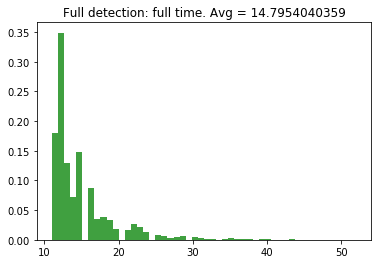

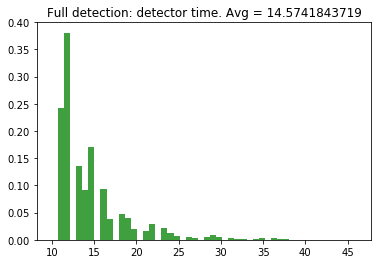

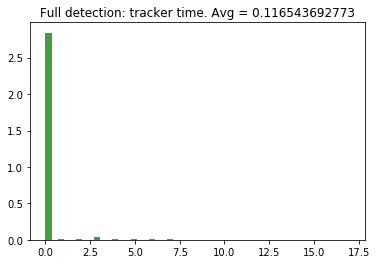

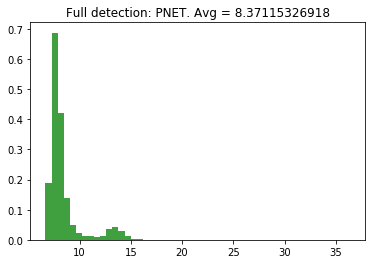

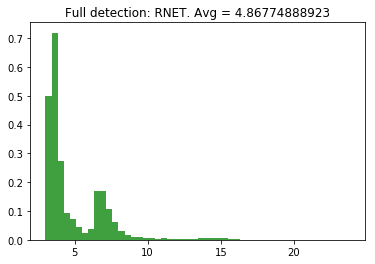

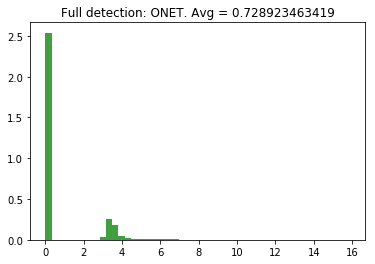

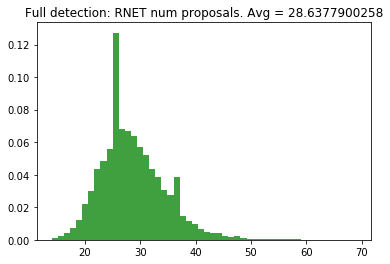

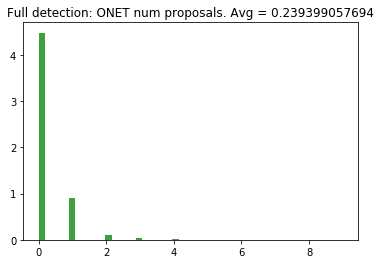

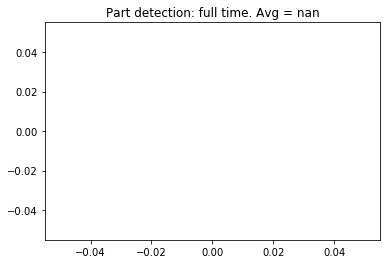

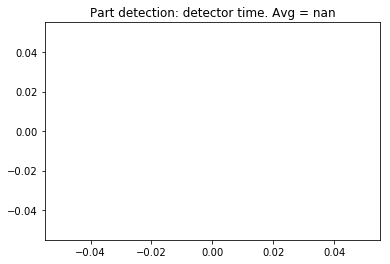

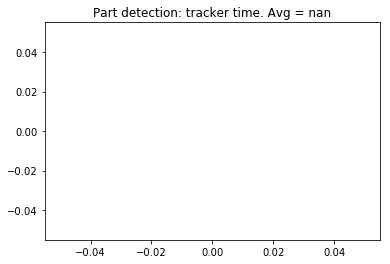

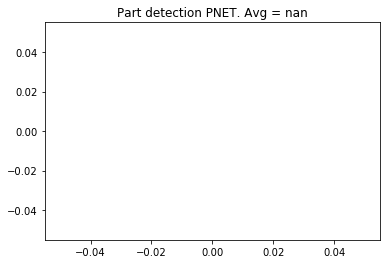

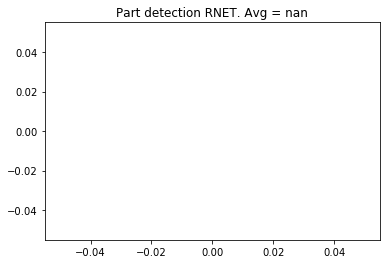

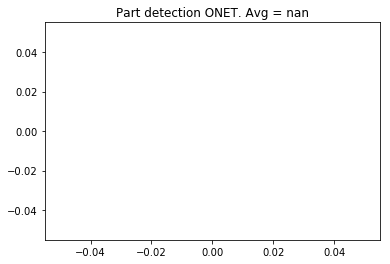

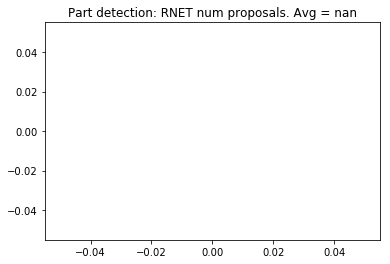

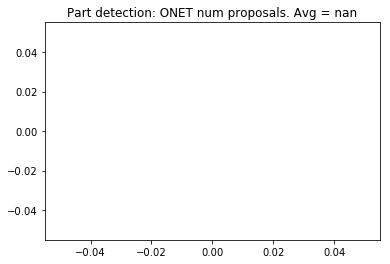

In [3]:
lines_fs = open('/Users/aachigorin/work/facestream_videos/profiling/fs_time_4/dit.cpu/log/facestream.INFO.20171010-142003.8956').readlines()
extract_stat(lines_fs)

Number of all frames = 22498
Part detection = 19685, full detection = 2813, proportion of part detections = 0.874966663703
Full time = 46263.0
Full detection:
	 full time = 41926.0
	 detector time = 41473.0
	 tracker time = 213.0
	 pnet time full = 23603.14169, ->run() = 19868.07399
	 rnet time full = 13379.33083, ->run() = 12254.69047, num_proposals = 80467
	 onet time full = 1915.20303, ->run() = 1882.54456, num_proposals = 661
Part detection:
	 full time = 4337.0
	 detector time = 2509.0
	 tracker time = 1554.0
	 pnet time = 0.0, ->run() = 0.0
	 rnet time = 1738.63577, ->run() = 1717.53783, num_proposals = 470
	 onet time = 484.72526, ->run() = 475.86888, num_proposals = 0


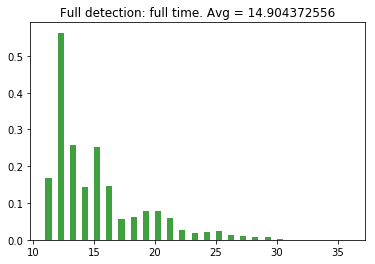

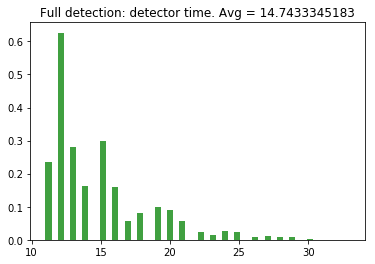

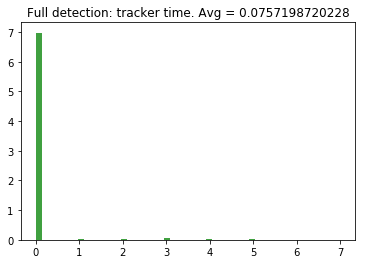

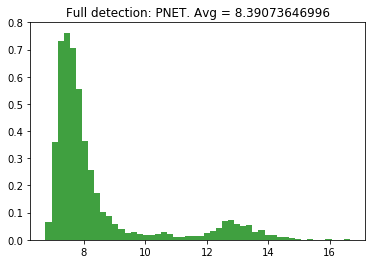

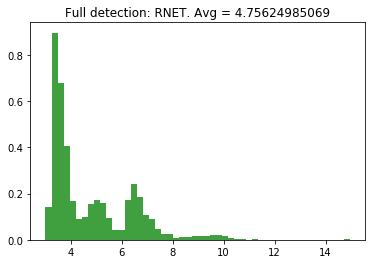

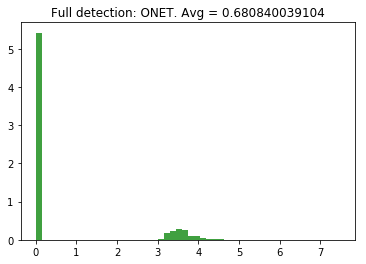

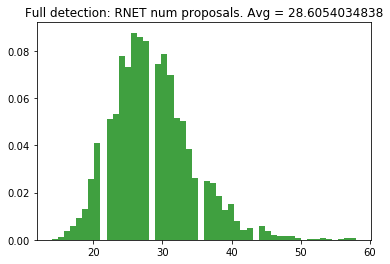

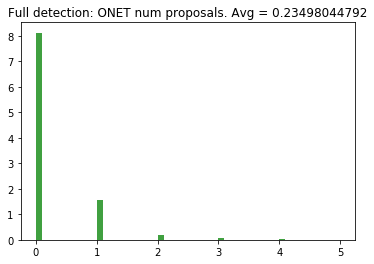

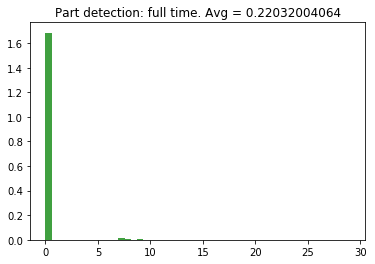

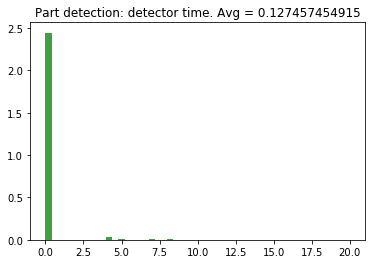

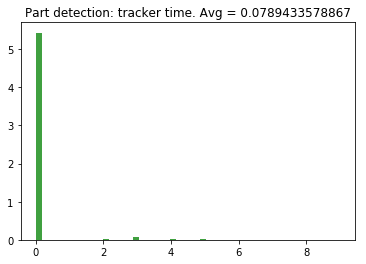

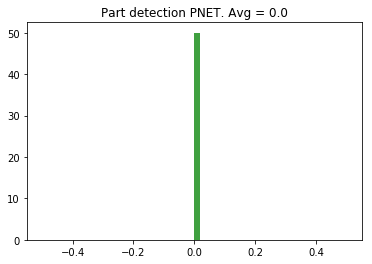

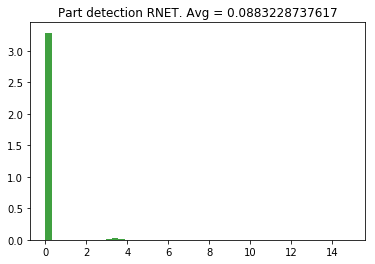

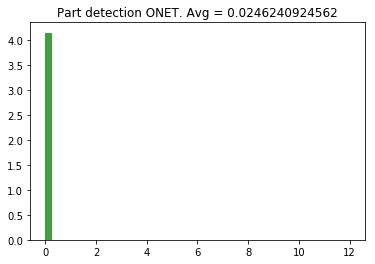

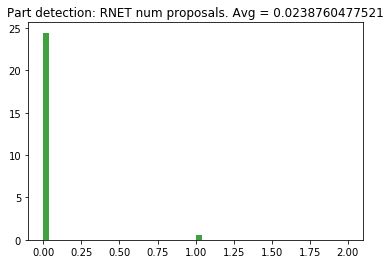

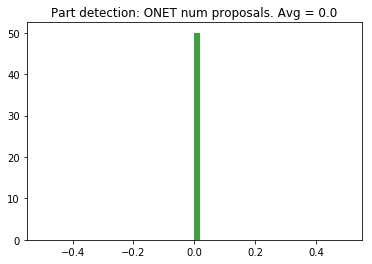

In [5]:
lines_fs = open('/Users/aachigorin/work/facestream_videos/profiling/fs_time_4/dit.cpu.redetect/log/facestream.INFO.20171010-144128.17364').readlines()
extract_stat(lines_fs)

Number of all frames = 22461
Part detection = 0, full detection = 22461, proportion of part detections = 0.0
Full time = 361777.0
Full detection:
	 full time = 361777.0
	 detector time = 305988.0
	 tracker time = 48085.0
	 pnet time full = 132424.19401, ->run() = 113729.58855
	 rnet time full = 94254.60659, ->run() = 89856.43913, num_proposals = 317630
	 onet time full = 62097.61147, ->run() = 60208.19416, num_proposals = 51763
Part detection:
	 full time = 0.0
	 detector time = 0.0
	 tracker time = 0.0
	 pnet time = 0.0, ->run() = 0.0
	 rnet time = 0.0, ->run() = 0.0, num_proposals = 0.0
	 onet time = 0.0, ->run() = 0.0, num_proposals = 0.0


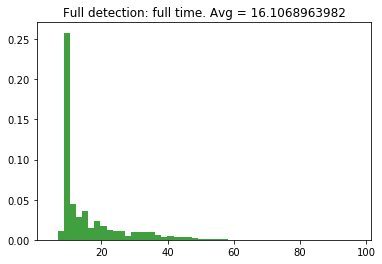

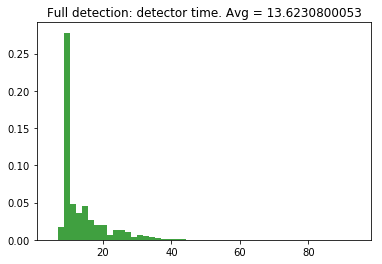

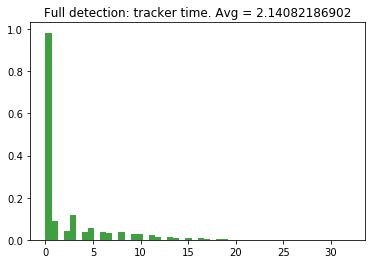

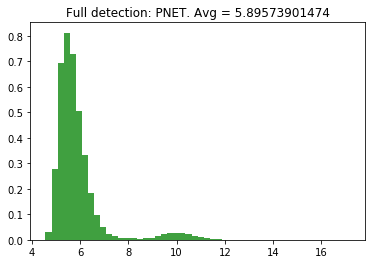

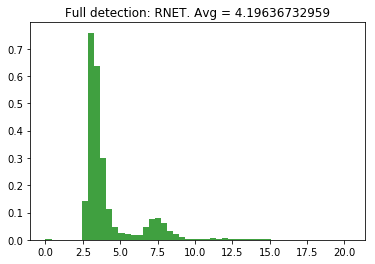

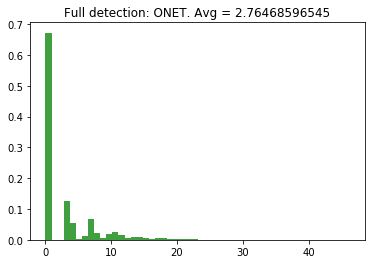

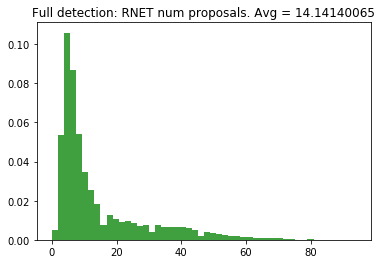

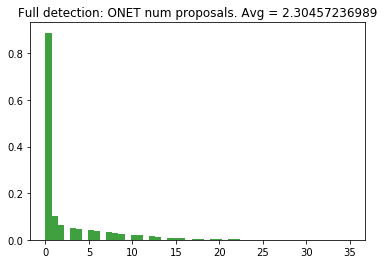

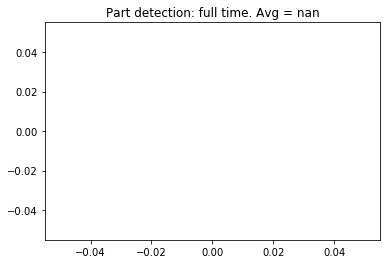

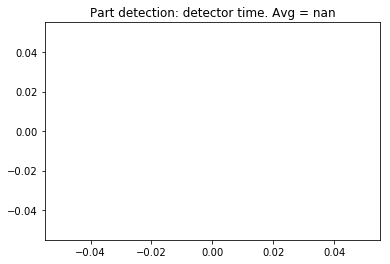

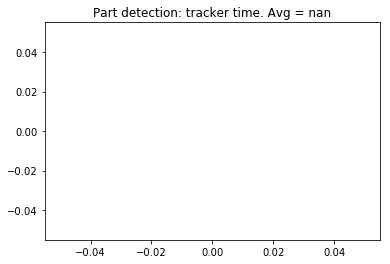

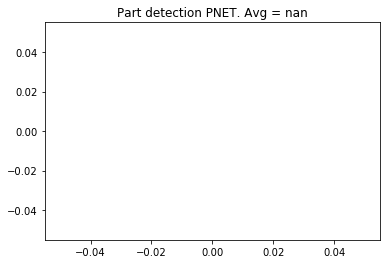

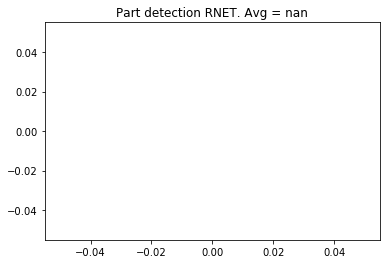

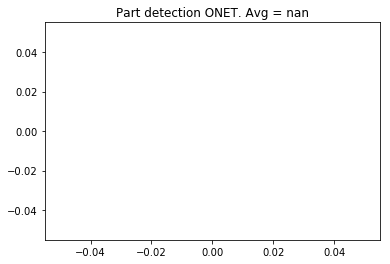

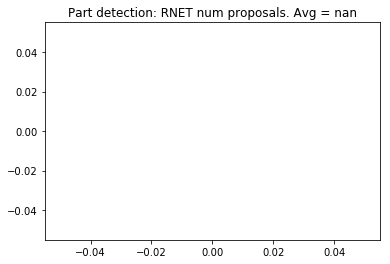

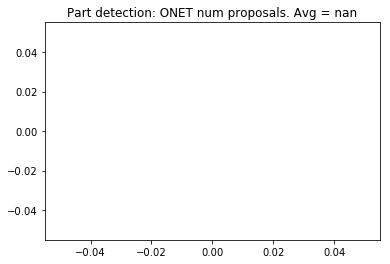

In [12]:
lines_fs = open('/Users/aachigorin/work/facestream_videos/profiling/fs_time_4/metro.cpu/log/facestream.INFO.20171010-155204.26712').readlines()
extract_stat(lines_fs)

Number of all frames = 22445
Part detection = 19136, full detection = 3309, proportion of part detections = 0.852572956115
Full time = 216082.0
Full detection:
	 full time = 68287.0
	 detector time = 54787.0
	 tracker time = 12213.0
	 pnet time full = 19543.16815, ->run() = 16717.61387
	 rnet time full = 16864.39766, ->run() = 15934.83238, num_proposals = 67925
	 onet time full = 15768.27264, ->run() = 15259.696, num_proposals = 14493
Part detection:
	 full time = 147795.0
	 detector time = 116791.0
	 tracker time = 26841.0
	 pnet time = 0.0, ->run() = 0.0
	 rnet time = 47027.2114, ->run() = 46618.98619, num_proposals = 11827
	 onet time = 37176.59473, ->run() = 36491.93447, num_proposals = 0


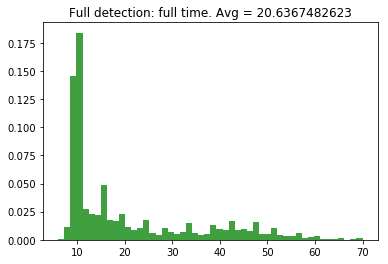

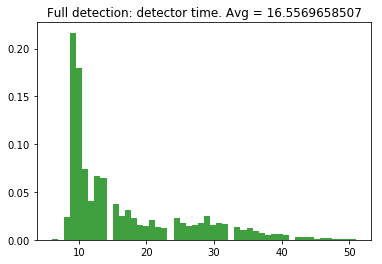

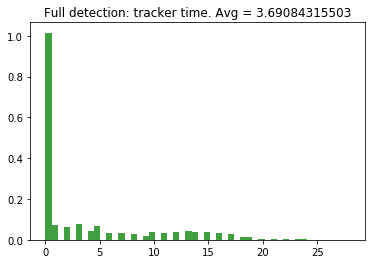

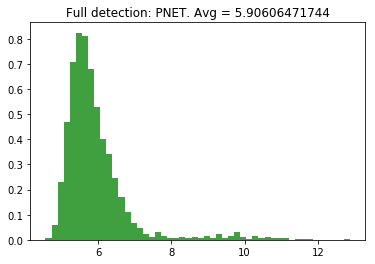

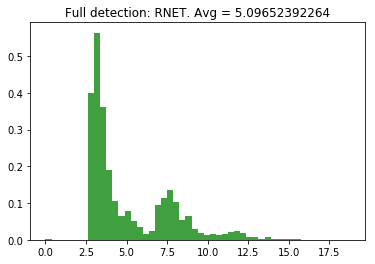

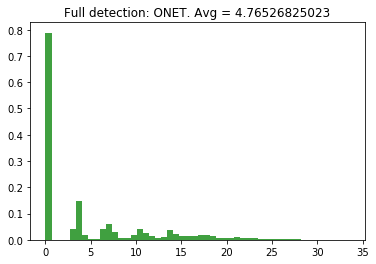

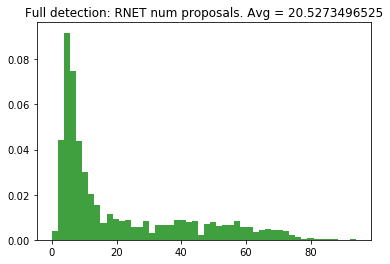

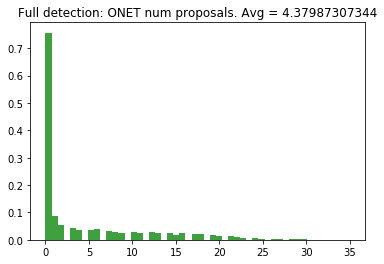

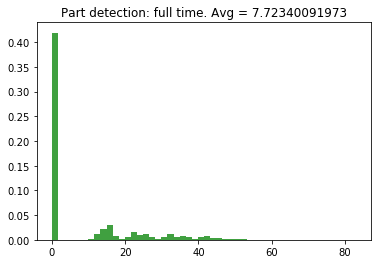

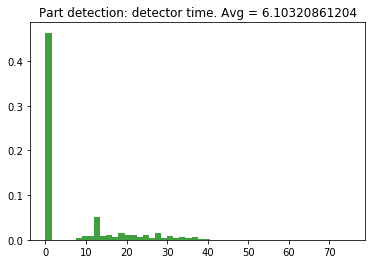

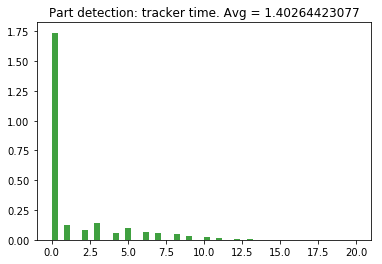

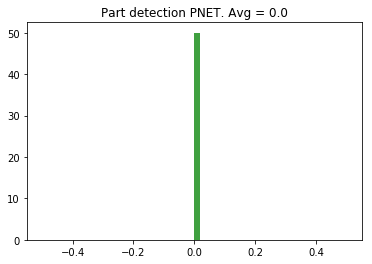

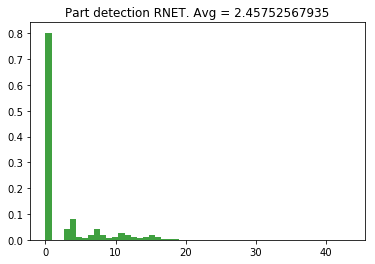

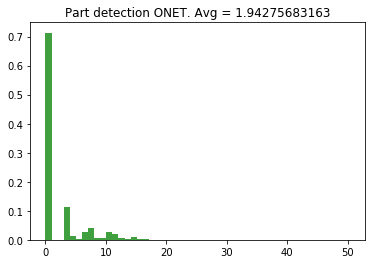

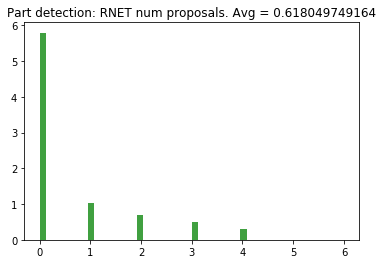

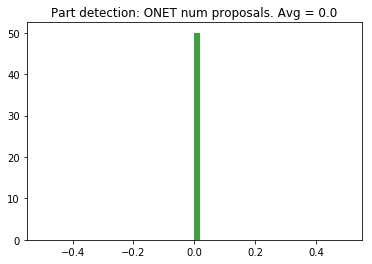

In [13]:
lines_fs = open('/Users/aachigorin/work/facestream_videos/profiling/fs_time_4/metro.cpu.redetect/log/facestream.INFO.20171010-162558.26708').readlines()
extract_stat(lines_fs)

In [ ]:
# metro2 cpu

In [ ]:
# metro2 cpu redetect